## Impor Library yang Dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set_style('whitegrid')

## Memuat dan Memeriksa Data

In [ ]:
# Muat dataset
file_path = 'data/Heart_Disease_Prediction.csv'
df = pd.read_csv(file_path)

df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})

# Tampilkan 5 baris pertama untuk verifikasi
print("5 Baris Pertama Data (setelah mapping):")
display(df.head())

# Tampilkan info untuk memastikan tipe data 'Heart Disease' sudah menjadi numerik
print("\nInformasi Dataset (setelah mapping):")
df.info()

5 Baris Pertama Data:


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence



Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: flo

## Exploratory Data Analysis (EDA)


Statistik Deskriptif:


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000



Jumlah Nilai yang Hilang per Kolom:
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


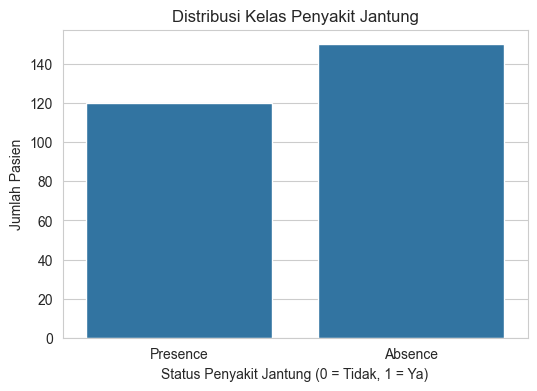

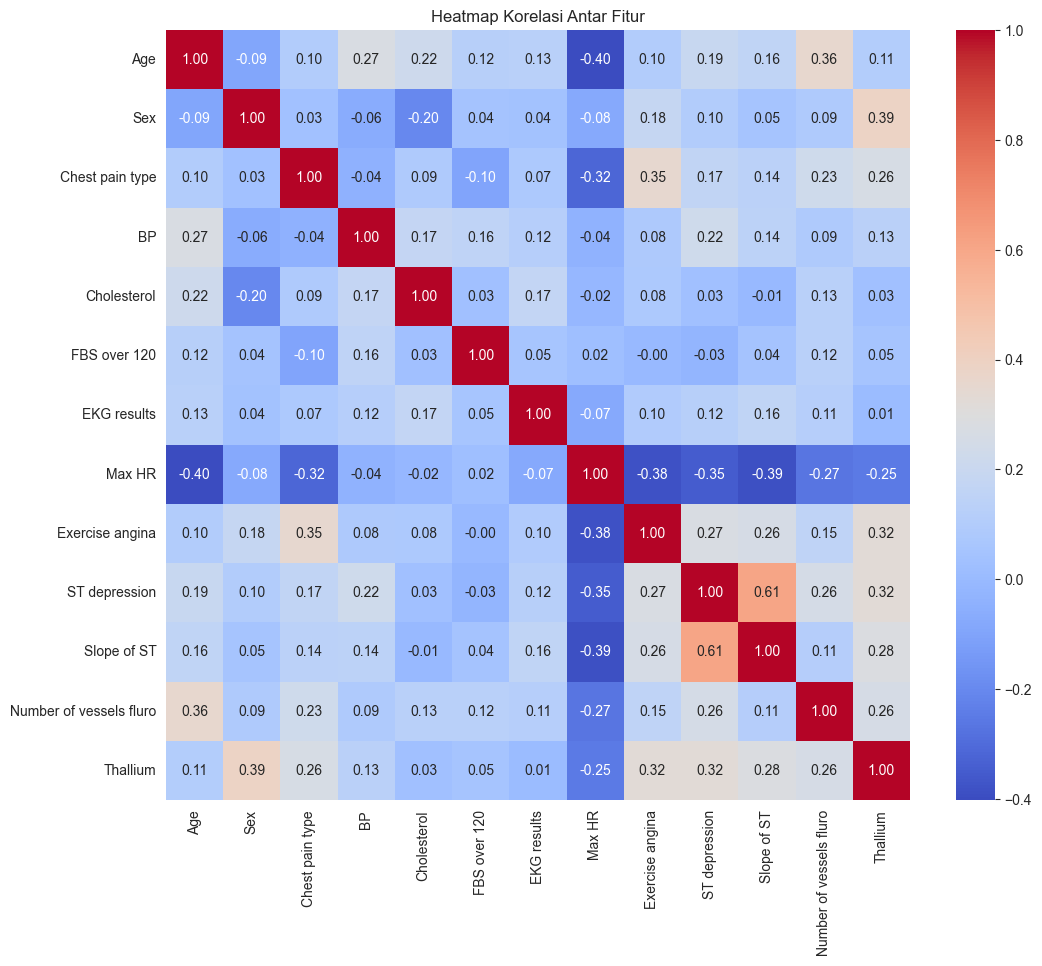

In [ ]:
TARGET_COLUMN = 'Heart Disease'

# Statistik deskriptif untuk fitur numerik
print("\nStatistik Deskriptif:")
display(df.describe())

# Cek nilai yang hilang (missing values)
print("\nJumlah Nilai yang Hilang per Kolom:")
print(df.isnull().sum())

# Visualisasi distribusi kelas target
plt.figure(figsize=(6, 4))
sns.countplot(x=TARGET_COLUMN, data=df)
plt.title('Distribusi Kelas Penyakit Jantung')
plt.xlabel('Status Penyakit Jantung (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah Pasien')
plt.show()

# Visualisasi korelasi antar fitur
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

## Preprocessing dan Persiapan Data

In [ ]:
# Memisahkan fitur (X) dan target (y)
X = df.drop(TARGET_COLUMN, axis=1)
y = df[TARGET_COLUMN]

# Membagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Bentuk data latih (X_train): {X_train.shape}")
print(f"Bentuk data uji (X_test): {X_test.shape}")

Bentuk data latih (X_train): (216, 13)
Bentuk data uji (X_test): (54, 13)


## Melatih Model Machine Learning

In [7]:
# Inisialisasi model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model
print("Memulai proses training model...")
model.fit(X_train, y_train)
print("Model berhasil dilatih!")

Memulai proses training model...
Model berhasil dilatih!


## Evaluasi Model

Akurasi Model: 0.8148

Laporan Klasifikasi:
              precision    recall  f1-score   support

     Absence       0.86      0.80      0.83        30
    Presence       0.77      0.83      0.80        24

    accuracy                           0.81        54
   macro avg       0.81      0.82      0.81        54
weighted avg       0.82      0.81      0.82        54


Confusion Matrix:


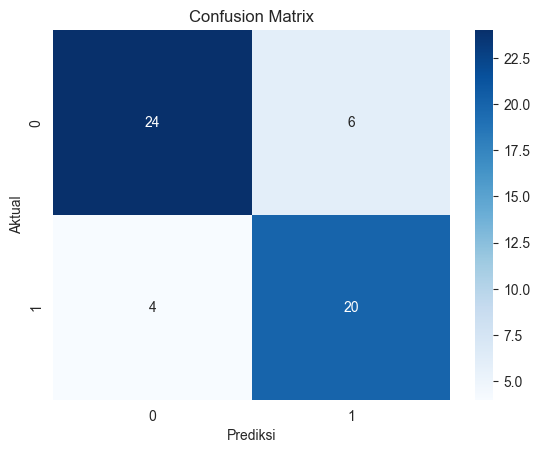

In [8]:
# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.4f}")

# Menampilkan laporan klasifikasi (presisi, recall, f1-score)
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

# Menampilkan confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

##  Menyimpan Model yang Telah Dilatih

In [ ]:
model_dir = 'model'
model_path = os.path.join(model_dir, 'random_forest_heart_disease.joblib')

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Simpan model
joblib.dump(model, model_path)

print(f"Model telah berhasil disimpan di: {model_path}")